# Project 2 - Book 3: Ames Housing Data Analysis

## Problem Statement

Our real estate investment company has newly set up a data science team. The main feedback from the invesmtent team is trouble identifying property with investment value due to the myriad of factors. We are tasked to find out what are strong predictors of housing prices. To do so, we will be examining ames housing data. We hope to be able to predict housing prices and therefore identify highly demanded features by potential homeowners so as to provide recommendations to guide the company's investment strategy.

## Executive Summary

We have been tasked to predict housing prices so as to generate actionable insights for the organisation to achieve larger margins in their investment strategy. In order to achieve our goals, we will be performing data cleaning, feature engineering, EDA, feature selection and lastly several regression models to predict sale prices. Based on an accuracy score, the best model will be evaluated and chosen to predict sale prices. Having mirrored the market, we can then find out which are the strong predictors of sale prices. With this information, the company is able to locate properties with the favoured features and flip them for profit, generating value for the management, shareholders and of course customers. 


## Notebooks:
- [Data Cleaning and Feature Selection](./book1_data_cleaning_feature_engineering.ipynb)
- [EDA and Feature Selection](./book2_eda_feature_selection.ipynb)
- [Preprocessing, Modeling and Recommendations](./book3_preprocesing_modeling_recommendations.ipynb)


## Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [Model Prep](#Model-Prep)
- [Cross Validation](#Cross-Validation)
- [Model Fitting and Evaluation](#Model-Fitting-and-Evaluation)
- [Recommendations](#Recommendations)
- [Conclusion](#Conclusion)
- [Kaggle Submission](#Kaggle-Submission)



### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV,ElasticNet
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#display all rows and columns of dataframe
pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

### Import data

In [3]:
ames_train=pd.read_csv('../datasets/train_clean_2.csv')

In [4]:
ames_train.shape

(2022, 123)

In [5]:
ames_train.head()

id  ms_subclass ms_zoning  lot_frontage  lot_area street lot_shape  \
0  109           60        RL     87.704386     13517   Pave       IR1   
1  544           60        RL     74.565274     11492   Pave       IR1   
2  153           20        RL     59.793192      7922   Pave       Reg   
3  318           60        RL     73.982942      9802   Pave       Reg   
4  255           50        RL     92.363094     14235   Pave       IR1   

  land_contour lot_config land_slope neighborhood condition_1 condition_2  \
0          Lvl    CulDSac        Gtl       Sawyer        RRAe        Norm   
1          Lvl    CulDSac        Gtl      SawyerW        Norm        Norm   
2          Lvl     Inside        Gtl        NAmes        Norm        Norm   
3          Lvl     Inside        Gtl       Timber        Norm        Norm   
4          Lvl     Inside        Gtl      SawyerW        Norm        Norm   

  bldg_type house_style  overall_qual  overall_cond  year_built  \
0      1Fam      2Story             6             8        1976   
1      1Fam      2Story             7             5        1996   
2      1Fam      1Story             5             7        1953   
3      1Fam      2Story             5             5        2006   
4      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1              3              1   
4             0.0          2          0    

In [6]:
ames_train.isnull().sum()
#no null values

id                  0
ms_subclass         0
ms_zoning           0
lot_frontage        0
lot_area            0
street              0
lot_shape           0
land_contour        0
lot_config          0
land_slope          0
neighborhood        0
condition_1         0
condition_2         0
bldg_type           0
house_style         0
overall_qual        0
overall_cond        0
year_built          0
year_remod/add      0
roof_style          0
roof_matl           0
exterior_1st        0
exterior_2nd        0
mas_vnr_type        0
mas_vnr_area        0
exter_qual          0
exter_cond          0
foundation          0
bsmt_qual           0
bsmt_cond           0
bsmt_exposure       0
bsmtfin_type_1      0
bsmtfin_sf_1        0
bsmtfin_type_2      0
bsmtfin_sf_2        0
bsmt_unf_sf         0
total_bsmt_sf       0
heating             0
heating_qc          0
central_air         0
electrical          0
1st_flr_sf          0
2nd_flr_sf          0
low_qual_fin_sf     0
gr_liv_area         0
bsmt_full_

### Model Prep

#### Model Prep: Create feature matrix (`X`) and target vector (`y`)

In [7]:
features=['nbhd_Blueste','nbhd_BrDale','nbhd_BrkSide','nbhd_ClearCr','nbhd_CollgCr',
          'nbhd_Crawfor','nbhd_Edwards','nbhd_Gilbert','nbhd_Greens','nbhd_GrnHill',
          'nbhd_IDOTRR','nbhd_Landmrk','nbhd_MeadowV','nbhd_Mitchel','nbhd_NAmes',
          'nbhd_NPkVill','nbhd_NWAmes','nbhd_NoRidge','nbhd_NridgHt','nbhd_OldTown',
          'nbhd_SWISU','nbhd_Sawyer','nbhd_SawyerW','nbhd_Somerst','nbhd_StoneBr',
          'nbhd_Timber','nbhd_Veenker','artery_dum','ns_rail_dum','ew_rail_dum',
          'feedr','two_stories','garage','kitchen_qual_nom','c_aircon',
          'heatingqc_nom','fireplace_qu_nom','bsmt_qual_nom','bsmt_cond_nom','exter_qual_nom',
          'exter_cond_nom','garage_qual_nom','garage_cond_nom','yr_sold_2007','yr_sold_2008',
          'yr_sold_2009','yr_sold_2010','age','overall_qual','gr_liv_area',
          'garage_area','total_bsmt_sf','year_built','year_remod/add','full_bath',
          'mas_vnr_area','totrms_abvgrd','fireplaces','lot_area','bedroom_abvgr']
X=ames_train[features]
y=ames_train['saleprice']

#### Model Prep: Train/test split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#here we split the data before scaling so that we dont scale the test data 

#### Model Prep: Scaling

In [9]:
ss=StandardScaler()

#fit on train set
ss.fit(X_train,y_train)
#transform on train set
X_train_ss=ss.transform(X_train)

#transform on test set
X_test_ss=ss.transform(X_test)

#### Model Prep: Instantiate the model

In [10]:
#create the LR model
lr=LinearRegression()

In [11]:
#create a range of alphas
r_alphas=np.logspace(0,5,200)

#create the Ridge model
ridge=RidgeCV(alphas=r_alphas,store_cv_values=True)

In [12]:
#create the Lasso model
lasso=LassoCV(n_alphas=100)

In [13]:
#create the enet model
enet=ElasticNetCV(l1_ratio=np.linspace(0.0001,1,50),n_alphas=100)

### Cross Validation

cv=10

In [14]:
#cross_val for all 4 models
lr_scores=cross_val_score(lr,X_train_ss,y_train,cv=10)
ridge_scores=cross_val_score(ridge,X_train_ss,y_train,cv=10)
lasso_scores=cross_val_score(lasso,X_train_ss,y_train,cv=10)
enet_scores=cross_val_score(enet,X_train_ss,y_train,cv=10)

In [15]:
print(f'Baseline score: {np.mean(y_train)}')
print(f'LR score: {lr_scores.mean()}')
print(f'Ridge score: {ridge_scores.mean()}')
print(f'Lasso score: {lasso_scores.mean()}')
print(f'Enet score: {enet_scores.mean()}')

Baseline score: 182727.34075448362
LR score: -9.590920427272829e+21
Ridge score: 0.875107271899707
Lasso score: 0.8755497783954291
Enet score: 0.8755497783954291


##### Observation on train score:
We have chosen to use R2 to compare models here as it is a relative measure of fit and it is intuitive. 

Baseline Score: without any machine learning, the simplest and safest attempt at predicting sale prices would be to take the mean.

LR Score: Given that the R2 ranges between 0 and 1, where 0 means that the model does not explain any changes in the target variable and 1 means that it fully explains it.
Looking at our LR score, I would venture our current model is highly likely to be overfitted. 

Ridge score: Ridge is a form of regularisation, which keeps the number of variables but reduces the weight of the coefficients to close to zero but not zero. This effectively removes multicollinearity. Here we see that with regularisation, our R2 has vastly improved. 

Lasso score: The difference between lasso and ridge is that lasso reduces the coefficient to zero, effectively removing the unnecessary variables from our model. Here we have our best R2 score. 
This implies that the relationship between the features and saleprice  accounts for 87% of the variation.

enet score: enet is a combination of ridge and lasso. It seems that our lasso score is optimal resulting in the enet producing the same results. 


With the above in mind, we will be using lasso as our model. 

### Model Fitting and Evaluation

In [16]:
#train the model on entire train dataset
lasso.fit(X_train_ss,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [17]:
#score on train data
lasso.score(X_train_ss,y_train)

0.8856330278454164

In [18]:
#score on test data
lasso.score(X_test_ss,y_test,)

0.8627337524299454

In [19]:
#next we predict the y values of the test 
pred=lasso.predict(X_test_ss)
#residual is the difference between our predictions and the actual y values
residual=pred-y_test

In [20]:
#we also check the rmse, as a secondary metric for fit
np.sqrt(mean_squared_error(y_test,pred))

26130.35254564219

##### Observation of test scores
Here we see that the R2 scores of the train and test data are slightly different. There is some variance in the scores and could definitely be improved further by reducing the bias, by reducing the number of variables. 


#### Coefficients

In [21]:
coef = pd.DataFrame(lasso.coef_, index = X_train.columns,columns=['coef']).sort_values('coef',ascending=False)
print(coef.head(10))
print(coef.tail(10))

                        coef
gr_liv_area     22651.724742
overall_qual    14533.916480
total_bsmt_sf   13872.236309
lot_area         7429.057167
garage_area      7230.166106
nbhd_StoneBr     6391.237469
nbhd_NridgHt     6356.984243
mas_vnr_area     5327.807963
fireplaces       4986.744361
year_remod/add   3694.718582
                         coef
nbhd_OldTown     -1484.318609
heatingqc_nom    -1664.916803
exter_cond_nom   -1731.272374
garage_qual_nom  -1760.100557
bedroom_abvgr    -1879.985559
age              -2817.390845
full_bath        -3158.009131
bsmt_qual_nom    -6216.223886
exter_qual_nom   -6414.147238
kitchen_qual_nom -6447.260178


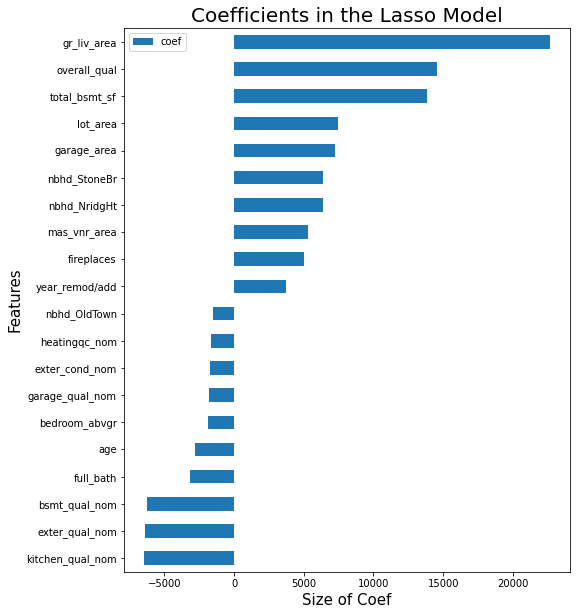

In [22]:
#lets see it in a horizontal bar chart
impt_coef = pd.concat([coef.head(10),
                     coef.tail(10)]).sort_values('coef',ascending=True)

plt.rcParams['figure.figsize'] = (8.0, 10.0)
impt_coef.plot(kind = 'barh')
plt.title('Coefficients in the Lasso Model',size=20)
plt.xlabel('Size of Coef', size=15)
plt.ylabel('Features', size=15);

##### Observations of coefficients
The most significant feature by far is the square footage above ground. This is aligned with our expectations that size does matter in housing sale prices. Other measures of property size also includes basement size which seems to bbe quite significant to home buyers. 

The second highest weightage comes from overall quality which measures general conditions. Again, this is expected and the inverse relationship between the sale price and age, an indicator of wear and tear further proves this. However, kitchen quality seems to have an inverse relationship with sale prices and doesnt seem to make much sense without further research or more data. 

Out of all the neighborhoods, 4 stand out. Northridge and Stone Brook seem to be preferred while Sawyer West and Old Town are not as preferred. Something that stood out to us was the accessibility variables. Contrary to what we believed proximity to major roads and railways did not seem to affect the sale prices

lastly, the amenities variables also largely had a positive significant impact of sale prices

#### Residuals

In [23]:
residual

1911    -13760.059745
1370    -29921.025641
252        758.428770
1554    -20557.170323
1802       955.897923
898     -30767.188395
161      67765.585927
1486    -10940.381235
1591     66909.885382
812      10478.445102
306      34675.289262
1172     -6861.495113
1534     47240.349707
96        5743.892112
1483     11926.145076
1143     26020.604589
1248    -18557.874449
676      19954.529983
671      29254.158008
226      -9059.606439
190       8088.528357
1221     11631.803799
1398     10787.909754
1684      6381.904573
1360     17633.358629
1788    -14741.279130
462      -8395.914915
284     -67228.808280
307      75041.957016
1906    -17173.957796
522      30992.956687
2019     -2062.225075
215     -33964.398072
1580      7632.250111
1566    -25913.398250
1735       210.381063
381     -19732.004636
469       5254.728804
1985     -7730.981231
453      19730.279837
1309    -12470.652397
1795      5487.972406
2007    -17352.616417
379      -4683.353640
235      30409.843323
303     -1

In [24]:
plt.figure(figsize=(6,5))
sns.scatterplot(pred,residual);

plt.title('Scatter of Residuals against Predictions ')
plt.ylabel('Predictions')
plt.ylabel('Residuals');

##### Observations on scatterplot of residuals
The residual plot looks pretty tight with the exception of houses above 400k. This could be because of the limited data to work with in that prcie range, since we saw ealirer in EDA that home buyers favored cheaper homes

In [25]:
plt.figure(figsize=(15,12))
sns.distplot(residual);

plt.title('Distribution of Residuals',size=20)
plt.xlabel('Residual',size=15);


The residuals are normally distributed with a small spread

### Recommendations

Our reccomendations are: 
- focus on larger property sizes. 

This is not limited to just the size of the property but also its basement and garage. According to third party research, ames is of high tornado risk and it would make sense that home owners will take that into consideration. This provides them with protection when the natural disaster hits them. 

- focus on Stone Brook and North Ridge

Stone Brook is within walking distance from Iowa State University and schools while North Ridge is home to the continuing care retirment community. The proximity to these areas could be a pulling factor for home owners. Coupled with the fact that it is a university district/elderly district crime rate could be lower, drawing more home owners. Of course, more data and domain knowledge would be needed. 

- focus on quality

It is not uncommon in the US for home buyers to purchase ready to live in property, which is there is a market for house flipping  (207,088 in 2017). And also why home buyers would focus on quality. By selecting and renovating with quality materials, we would be able to command higher prices and therefore profits

### Conclusion

Our problem statement was to be able to predict housing prices through the use of a regression model and therefore identify highly demanded features by potential homeowners so as to provide recommendations to guide the company's investment strategy.

Through data cleaning, EDA, feature engineering and selection, we managed to run our data through a lasso regression model to produce predicted sale prices. Through the use of the R2 metric, we evaluated our model and infered that the relationship between our selected features and saleprice accounts for 87.4% of the variation.
With a high level of certainty, we were then able to identify strong predictors of price in choosing properties to invest in. These houses should typically have a large living area in specific neighbourhoods and with a focus on the quality of the build of the house. 

With the above recommendations, we can help guide the investment team in their decision making, deriving value for the management team and shareholders. 

#### Next steps

To further improve our model, I believe that we would hav to include more macroenvironment variables. In the current daatset, we only had the year sold that was indicative of the subprime financial crisis. The variable yr_sold_2009 had a negative impact on sale prices. It would have been interesting to find out more about other macro environment varibales that could have predicted sale price such as interest rates etc. 

### Reference

https://datausa.io/profile/geo/ames-ia/#housing

http://www.usa.com/ames-ia-natural-disasters-extremes.htm

https://en.wikipedia.org/wiki/Flipping

### Kaggle submission

In [26]:
test_clean=pd.read_csv('../datasets/test_clean.csv')

In [27]:
#check for null values
test_clean.isnull().sum()

#drop the saleprice column which shouldnt be there
test_clean.drop('saleprice',axis=1,inplace=True)

In [28]:
#create feature matrix for test data
X=test_clean[features]

#scale on train data
X_ss=ss.transform(X)

#predict based on test data
pred_test=lasso.predict(X_ss)

In [29]:
#combine with id into a dataframe
y_pred=pd.DataFrame(list(zip([id for id in test_clean.id],pred_test)),
                    columns=['Id','SalePrice'])

#convert id to int
y_pred.Id=y_pred.Id.astype(int,)

In [32]:
#save to csv
y_pred.to_csv('../datasets/test_pred.csv',index=False)